In [50]:
%load_ext autoreload
%autoreload 2

from functions_peaks import LoadAPI, PlotLine, MovingAverageIntervals, ExponentialDecayMovingAverage, \
    SignalSerie, LoadOHLCV1d

TOKEN = "REMOVED_FOR_SAFETY"
df_z = LoadAPI(TOKEN, item="net_unrealized_profit_loss/net_unrealized_profit_loss")
print(df_z.columns)

df_1d = LoadOHLCV1d()
print(df_1d.columns)

window_size = 100
column = "Close_log"
alpha = 0.03

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index(['date', 'net_unrealized_profit_loss'], dtype='object')


100%|██████████| 18.7M/18.7M [00:02<00:00, 9.65MB/s]

Extracting files...


Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore', 'Close.time', 'Close_log'],
      dtype='object')


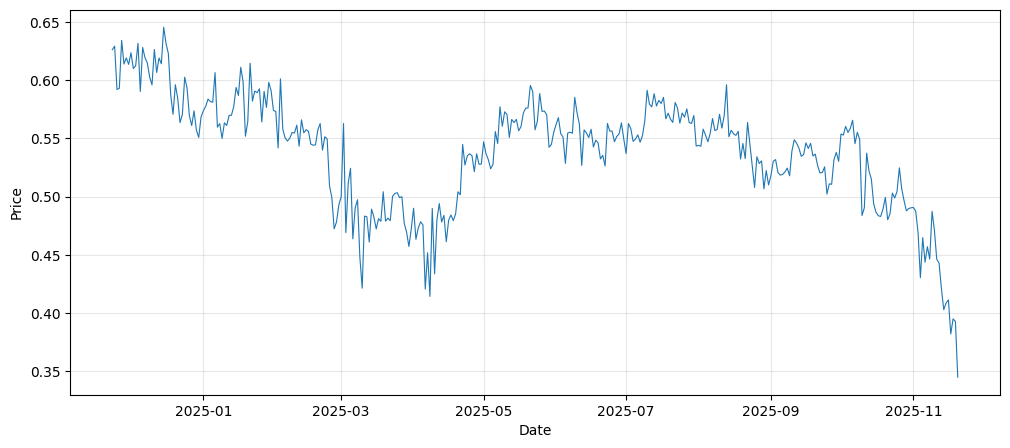

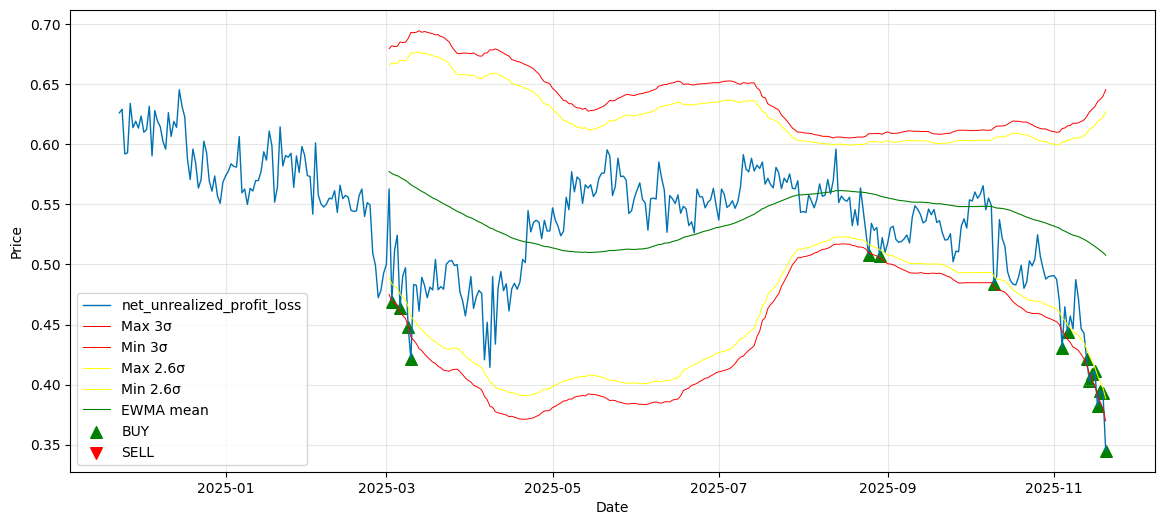

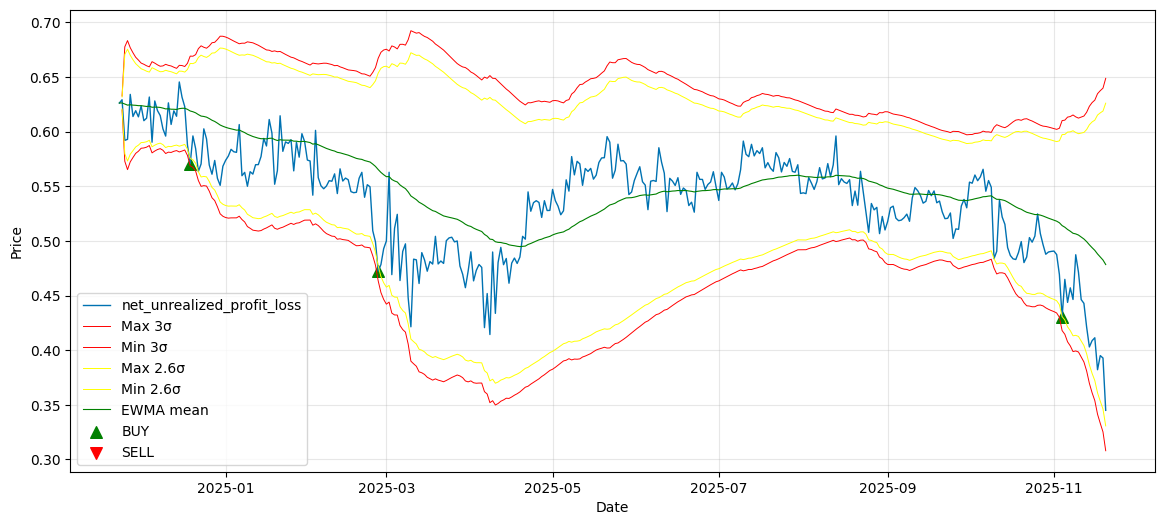

In [51]:
PlotLine(df_z, x_col="date", y_col="net_unrealized_profit_loss")

df_z_int = MovingAverageIntervals(df_z, window_size=window_size, column="net_unrealized_profit_loss")
df_z_sigma_int = SignalSerie(df_z_int, x_col="date", y_col="net_unrealized_profit_loss")

df_z_ema = ExponentialDecayMovingAverage(df_z, column="net_unrealized_profit_loss", alpha=alpha, window_size=None)
df_z_sigma_ema = SignalSerie(df_z_ema, x_col="date", y_col="net_unrealized_profit_loss", ema=True)

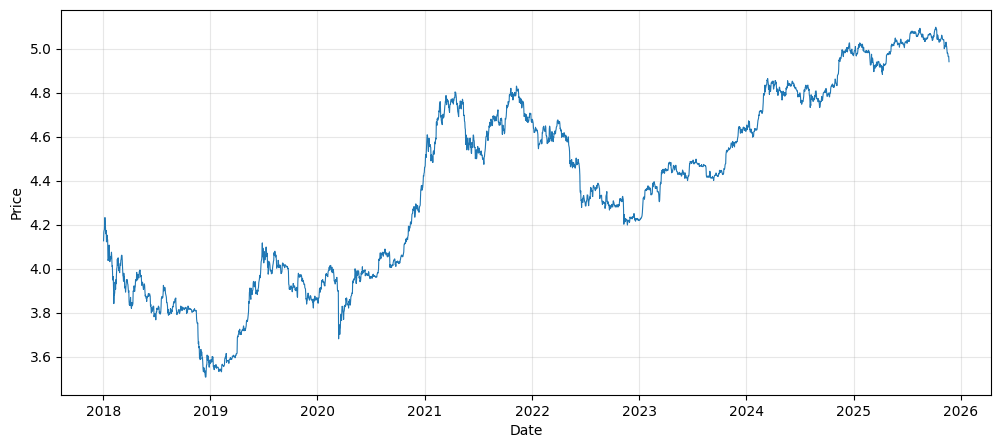

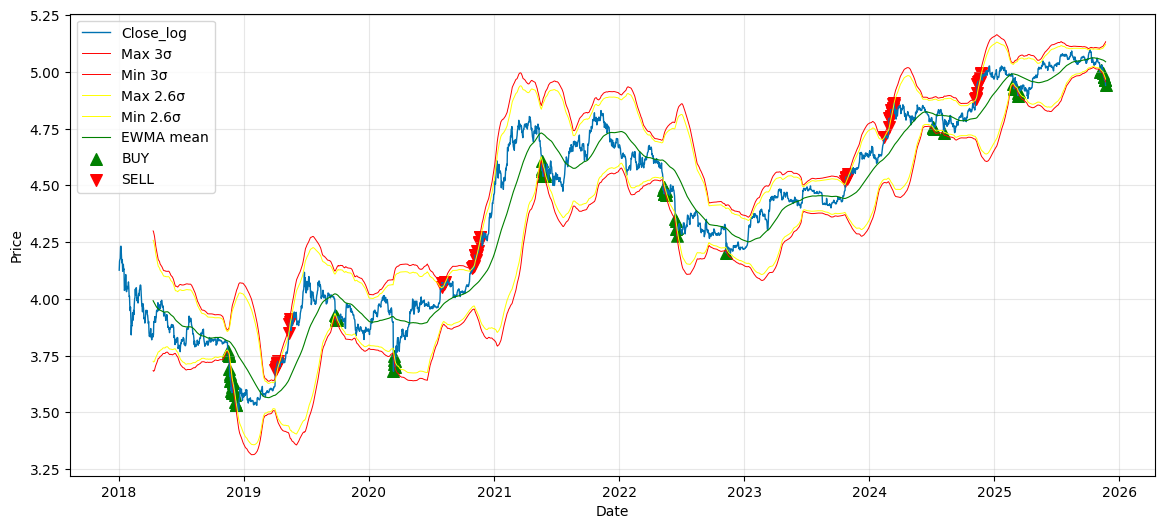

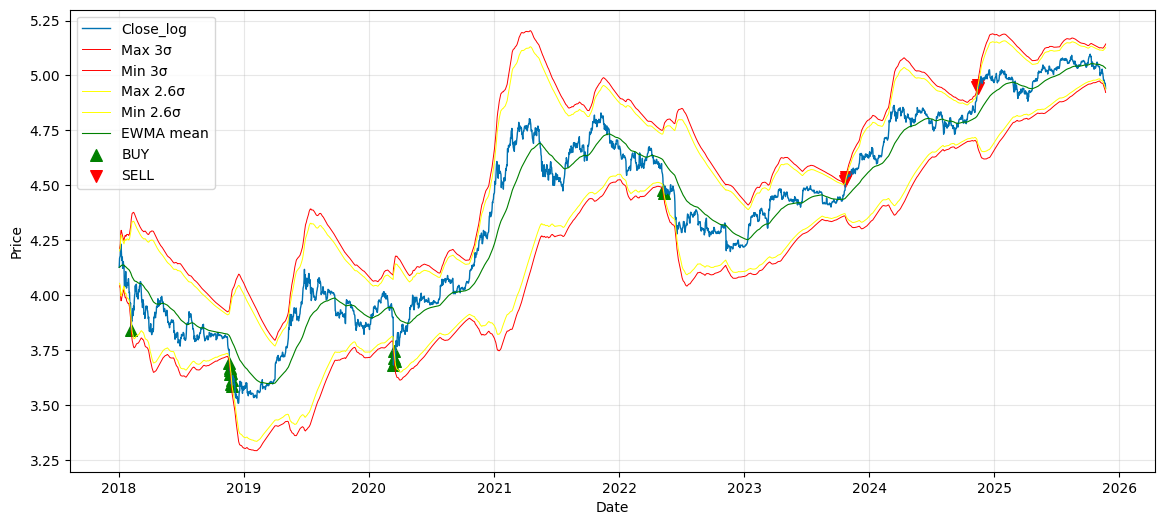

In [53]:
PlotLine(df_1d, x_col="Close.time", y_col="Close_log")

df_int = MovingAverageIntervals(df_1d, window_size=window_size, column=column)
df_signal_int = SignalSerie(df_int, x_col="Close.time", y_col="Close_log", ema=False)

df_ema = ExponentialDecayMovingAverage(df_1d, column="Close_log", alpha=None, window_size=window_size)
df_signal_ema = SignalSerie(df_ema, x_col="Close.time", y_col="Close_log", ema=True)